## Bollinger Band®

A Bollinger Band® is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.

In [17]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook 
# works in Jupyter, not VScode

In [18]:
ticker = pdr.get_data_yahoo("BA", dt.datetime(2020, 1, 1), dt.datetime.now())[['Close', 'High', 'Low']]
print(ticker)

                 Close        High         Low
Date                                          
2019-12-31  325.760010  326.570007  323.320007
2020-01-02  333.320007  333.350006  327.700012
2020-01-03  332.760010  334.890015  330.299988
2020-01-06  333.739990  334.859985  327.880005
2020-01-07  337.279999  344.190002  330.709991
...                ...         ...         ...
2021-07-22  220.869995  222.250000  218.309998
2021-07-23  221.520004  224.630005  220.940002
2021-07-26  225.850006  226.119995  219.889999
2021-07-27  222.270004  225.699997  220.419998
2021-07-28  231.570007  237.490005  231.330002

[397 rows x 3 columns]


### Calculation

Refering to Investopedia.org to get the answer, which states that the Bollinger Bands are calculated as follows.

BOLU=MA(TP,n)+m∗σ[TP,n]

BOLD=MA(TP,n)−m∗σ[TP,n]

Where BOLU is the Upper Bollinger Band and BOLD is Lower Bollinger Band. The MA is the Moving Average. The TP and σ are calculated as follows.

TP (typical price)=(High+Low+Close)÷3

σ[TP,n] = Standard Deviation over last n periods of TP​

Where n is the number of days in smoothing period (typically 20), and m is the number of standard deviations (typically 2).

In [19]:
ticker['TP'] = (ticker['Close'] + ticker['Low'] + ticker['High'])/3
ticker['std'] = ticker['TP'].rolling(20).std(ddof=0)
ticker['MA-TP'] = ticker['TP'].rolling(20).mean()
ticker['BOLU'] = ticker['MA-TP'] + 2*ticker['std']
ticker['BOLD'] = ticker['MA-TP'] - 2*ticker['std']
print(ticker)

                 Close        High         Low          TP        std  \
Date                                                                    
2019-12-31  325.760010  326.570007  323.320007  325.216675        NaN   
2020-01-02  333.320007  333.350006  327.700012  331.456675        NaN   
2020-01-03  332.760010  334.890015  330.299988  332.650004        NaN   
2020-01-06  333.739990  334.859985  327.880005  332.159993        NaN   
2020-01-07  337.279999  344.190002  330.709991  337.393331        NaN   
...                ...         ...         ...         ...        ...   
2021-07-22  220.869995  222.250000  218.309998  220.476664  10.877622   
2021-07-23  221.520004  224.630005  220.940002  222.363337  10.369452   
2021-07-26  225.850006  226.119995  219.889999  223.953334   9.476674   
2021-07-27  222.270004  225.699997  220.419998  222.796666   9.153244   
2021-07-28  231.570007  237.490005  231.330002  233.463338   8.931137   

                 MA-TP        BOLU        BOLD  
D

<IPython.core.display.Javascript object>


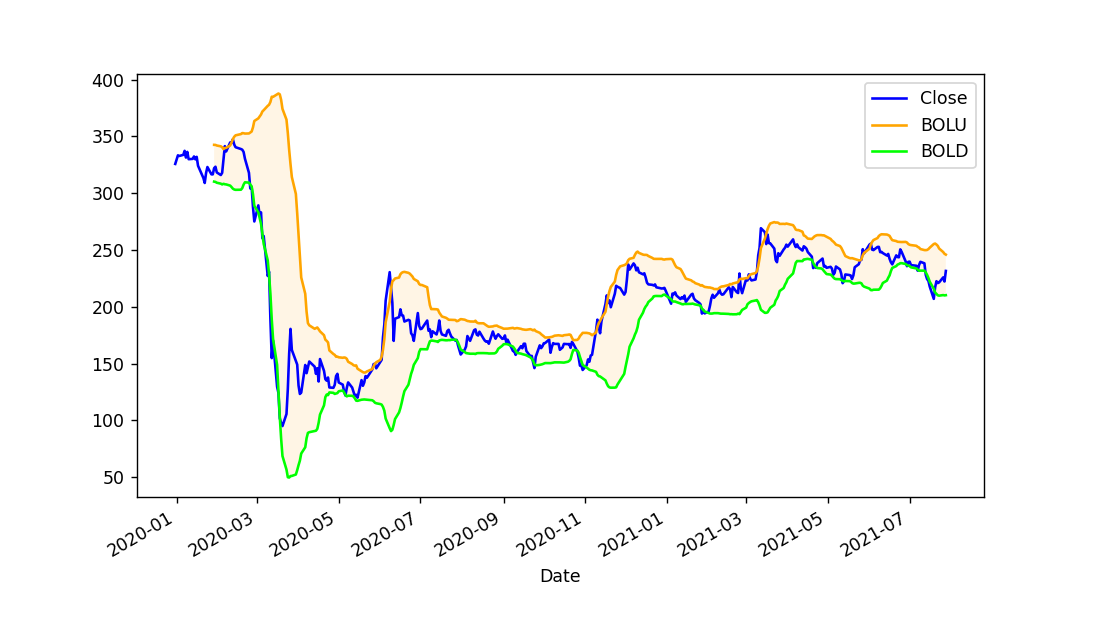

In [21]:
# Plotting using matplotlib
ax = ticker[['Close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'lime'])
ax.fill_between(ticker.index, ticker['BOLD'], ticker['BOLU'], facecolor='orange', alpha=0.1)
plt.show()
